# ChE Math Project 1

Using Regression tools (t-test, U test and Linear regression with interaction) to analyze Covid-19 data

### Goal: To analyze the county-wise data of the New England region to answer the following questions

1. Did counties with higher population of children (age < 18 years) have lower number of Covid-19 cases during the holiday season (October - December) of the year 2020?

2. Did counties with higher diversity index have higher number of Covid-19 cases during the holiday season (October - December) of the year 2020?

3. Did counties with lower diversity index and lower population of children have lower number of Covid-19 cases during the holiday season (October - December) of the year 2020?

In [1]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Final data for project.csv") 

## Bar charts of county-wise raw data collected for the New England region 

Text(0, 0.5, '% Population with Covid 19 cases')

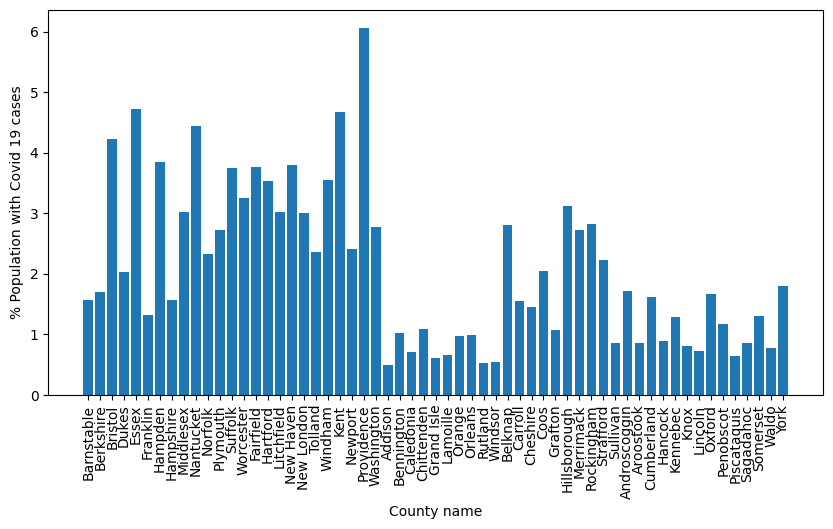

In [3]:
plt.figure(figsize=(10, 5))
plt.bar(data["County name"], data["% Population with Covid 19 cases"])
plt.xticks(rotation=90)
plt.xlabel("County name")
plt.ylabel("% Population with Covid 19 cases")

Text(0, 0.5, 'Population % under age of 18')

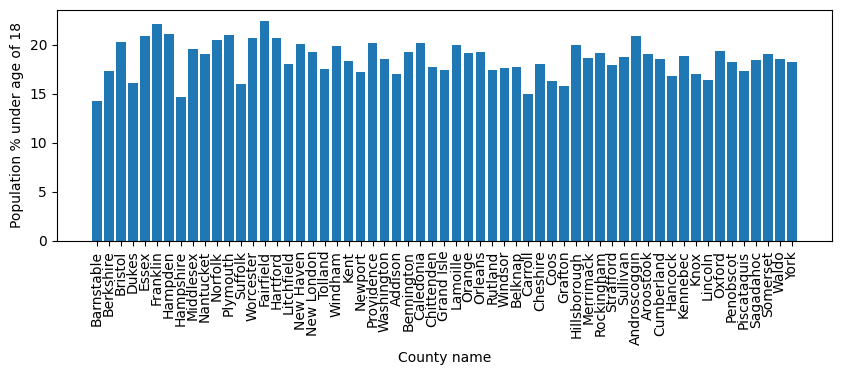

In [4]:
plt.figure(figsize=(10, 3))
plt.bar(data["County name"], data["Population % under age of 18"])
plt.xticks(rotation=90)
plt.xlabel("County name")
plt.ylabel("Population % under age of 18")

Text(0, 0.5, 'Diversity Index (%)')

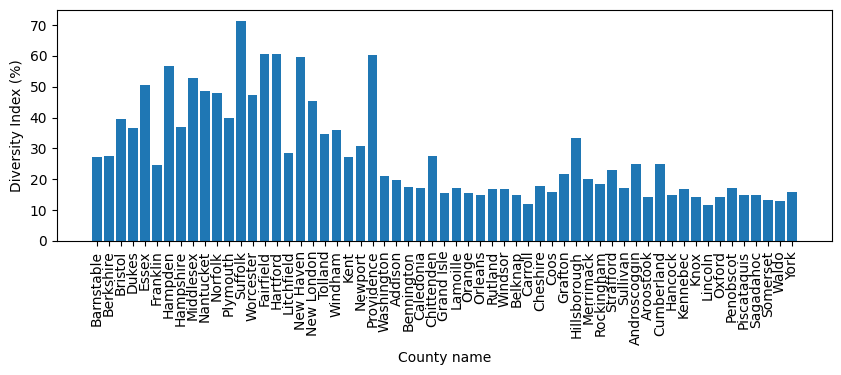

In [5]:
plt.figure(figsize=(10, 3))
plt.bar(data["County name"], data["Diversity Index (%)"])
plt.xticks(rotation=90)
plt.xlabel("County name")
plt.ylabel("Diversity Index (%)")

## Plots to show the variation of Covid-19 cases based on percentage of population under age of 18 and diversity index

Text(0, 0.5, 'Population % under age of 18')

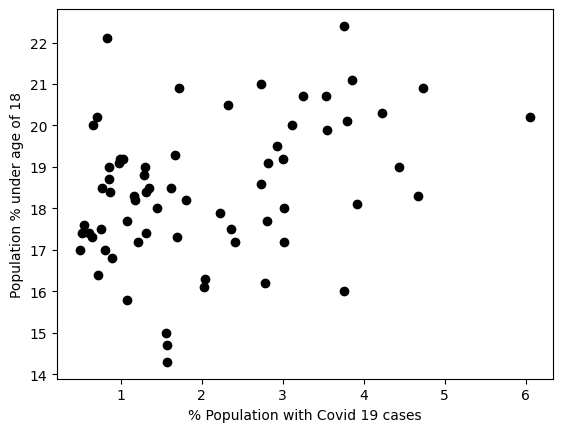

In [6]:
plt.plot( data["% Population with Covid 19 cases"],data["Population % under age of 18"], 'ko')
plt.xlabel("% Population with Covid 19 cases")
plt.ylabel("Population % under age of 18")

Text(0, 0.5, 'Diversity Index (%)')

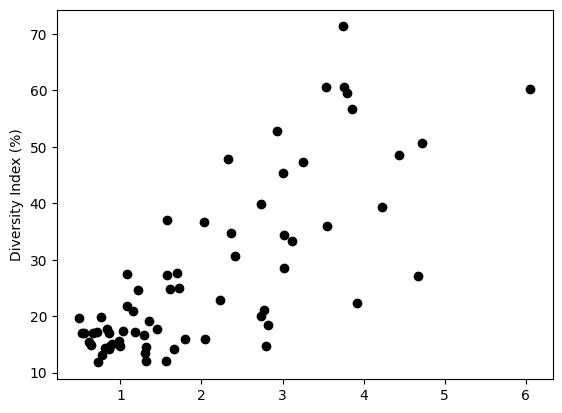

In [7]:
plt.plot( data["% Population with Covid 19 cases"],data["Diversity Index (%)"], 'ko')
plt.xlabel("")
plt.ylabel("Diversity Index (%)")

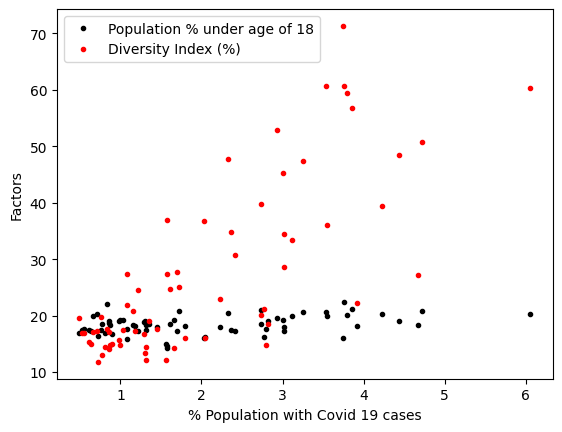

In [8]:
plt.plot( data["% Population with Covid 19 cases"],data["Population % under age of 18"], 'ko', markersize = 3)
plt.plot( data["% Population with Covid 19 cases"],data["Diversity Index (%)"], 'ro', markersize = 3)
plt.xlabel("% Population with Covid 19 cases")
plt.ylabel("Factors")
plt.legend(tuple(['Population % under age of 18','Diversity Index (%)']))

## Plot of chosen factors to qualitatively determine their degree of independence

Text(0, 0.5, 'Diversity Index (%)')

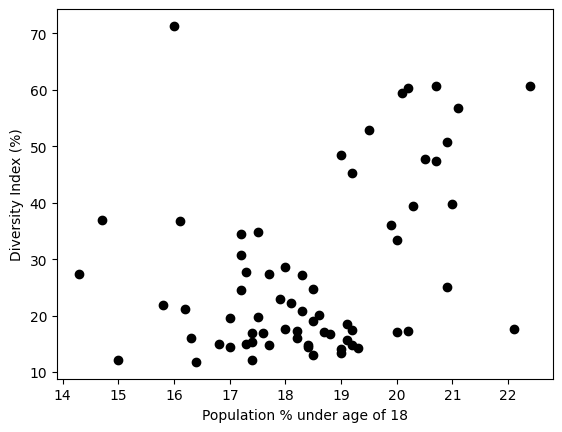

In [9]:
plt.plot( data["Population % under age of 18"],data["Diversity Index (%)"], 'ko')
plt.xlabel("Population % under age of 18")
plt.ylabel("Diversity Index (%)")

## Discretization of data based on factors chosen and displaying data for each category combination

In [10]:
data.loc[data["Population % under age of 18"] < 18, 'group_age'] = 0 
data.loc[data["Population % under age of 18"] >= 18, 'group_age'] = 1
data.loc[data["Diversity Index (%)"] < 25, 'group_diversity'] = 0 
data.loc[data["Diversity Index (%)"] >= 25, 'group_diversity'] = 1

In [11]:
data.loc[(data['group_age'] == 1) & (data['group_diversity'] == 1), 'Group'] = 'Four'
data.loc[(data['group_age'] == 0) & (data['group_diversity'] == 1), 'Group'] = 'Three'
data.loc[(data['group_age'] == 1) & (data['group_diversity'] == 0), 'Group'] = 'Two'
data.loc[(data['group_age'] == 0) & (data['group_diversity'] == 0), 'Group'] = 'One'

In [12]:
data1 = data.loc[data['Group'] == 'One']
data1

,State,County name,% Population with Covid 19 cases,Population % under age of 18,Diversity Index (%),group_age,group_diversity,Group
5,Massachusetts,Franklin,1.219220,17.2,24.6,0.0,0.0,One
26,Rhode Island,Washington,2.776516,16.2,21.1,0.0,0.0,One
27,Vermont,Addison,0.495142,17.0,19.6,0.0,0.0,One
31,Vermont,Essex,1.316726,17.4,12.1,0.0,0.0,One
33,Vermont,Grand Isle,0.617030,17.4,15.4,0.0,0.0,One
37,Vermont,Rutland,0.528297,17.4,17.0,0.0,0.0,One
39,Vermont,Windham,0.755909,17.5,19.8,0.0,0.0,One
40,Vermont,Windsor,0.545426,17.6,17.0,0.0,0.0,One
41,New Hampshire,Belknap,2.801978,17.7,14.8,0.0,0.0,One
42,New Hampshire,Carroll,1.558664,15.0,12.1,0.0,0.0,One


In [13]:
data2 = data.loc[data['Group'] == 'Two']
data2

,State,County name,% Population with Covid 19 cases,Population % under age of 18,Diversity Index (%),group_age,group_diversity,Group
22,Rhode Island,Bristol,3.915894,18.1,22.3,1.0,0.0,Two
28,Vermont,Bennington,1.030873,19.2,17.4,1.0,0.0,Two
29,Vermont,Caledonia,0.707836,20.2,17.2,1.0,0.0,Two
32,Vermont,Franklin,0.828895,22.1,17.7,1.0,0.0,Two
34,Vermont,Lamoille,0.659087,20.0,17.1,1.0,0.0,Two
35,Vermont,Orange,0.980292,19.1,15.6,1.0,0.0,Two
36,Vermont,Orleans,0.992954,19.2,14.8,1.0,0.0,Two
38,Vermont,Washington,1.347668,18.5,19.1,1.0,0.0,Two
43,New Hampshire,Cheshire,1.453085,18.0,17.7,1.0,0.0,Two
47,New Hampshire,Merrimack,2.728727,18.6,20.1,1.0,0.0,Two


In [14]:
data3 = data.loc[data['Group'] == 'Three']
data3

,State,County name,% Population with Covid 19 cases,Population % under age of 18,Diversity Index (%),group_age,group_diversity,Group
0,Massachusetts,Barnstable,1.570770,14.3,27.3,0.0,1.0,Three
1,Massachusetts,Berkshire,1.698107,17.3,27.7,0.0,1.0,Three
3,Massachusetts,Dukes,2.033981,16.1,36.7,0.0,1.0,Three
7,Massachusetts,Hampshire,1.576632,14.7,37.0,0.0,1.0,Three
12,Massachusetts,Suffolk,3.751429,16.0,71.3,0.0,1.0,Three
17,Connecticut,Middlesex,3.021097,17.2,34.4,0.0,1.0,Three
20,Connecticut,Tolland,2.364557,17.5,34.8,0.0,1.0,Three
24,Rhode Island,Newport,2.411172,17.2,30.7,0.0,1.0,Three
30,Vermont,Chittenden,1.081849,17.7,27.4,0.0,1.0,Three


In [15]:
data4 = data.loc[data['Group'] == 'Four']
data4

,State,County name,% Population with Covid 19 cases,Population % under age of 18,Diversity Index (%),group_age,group_diversity,Group
2,Massachusetts,Bristol,4.228936,20.3,39.4,1.0,1.0,Four
4,Massachusetts,Essex,4.726059,20.9,50.7,1.0,1.0,Four
6,Massachusetts,Hampden,3.851876,21.1,56.7,1.0,1.0,Four
8,Massachusetts,Middlesex,2.931124,19.5,52.8,1.0,1.0,Four
9,Massachusetts,Nantucket,4.440547,19.0,48.5,1.0,1.0,Four
10,Massachusetts,Norfolk,2.329538,20.5,47.8,1.0,1.0,Four
11,Massachusetts,Plymouth,2.729556,21.0,39.8,1.0,1.0,Four
13,Massachusetts,Worcester,3.255613,20.7,47.3,1.0,1.0,Four
14,Connecticut,Fairfield,3.762616,22.4,60.6,1.0,1.0,Four
15,Connecticut,Hartford,3.535972,20.7,60.6,1.0,1.0,Four


### Did counties with higher population of children (age < 18 years) have lower percentage of Covid-19 cases during the holiday season (October - December) of the year 2020?

Performing a t-test with null hypothesis that counties with the population of children (age < 18 years) less than 18 % had lower percent of Covid-19 cases during the holiday season of 2020

In [20]:
from scipy import stats

data_less18 = pd.concat([data1,data3])
data_more18 = pd.concat([data2, data4])

stats.ttest_ind(data_less18["% Population with Covid 19 cases"], data_more18["% Population with Covid 19 cases"], nan_policy='propagate', alternative='less')

Ttest_indResult(statistic=-2.588273260088136, pvalue=0.005943961693311363)

Comparing the result with U-statistic to determine if assumption of normal distributuion of data is valid

In [21]:
stats.mannwhitneyu(data_less18["% Population with Covid 19 cases"], data_more18["% Population with Covid 19 cases"], alternative = 'less')

MannwhitneyuResult(statistic=345.0, pvalue=0.007922793114228993)

The p value results from both t-test and U-test are comparable and almost zero. This suggests that the null hypothesis is invalid and the counties with a population of more than 18 % of children had higher percentage of Covid-19 cases during the holiday season in 2020 than the counties with a population of children being less than 18 % in the New England region. 

### Did counties with higher diversity index have higher percentage of Covid-19 cases during the holiday season (October - December) of the year 2020?

Performing a t-test with null hypothesis that counties with the diversity index greater than 25 % had higher percentage of Covid-19 cases during the holiday season of 2020

In [24]:
data_less25 = pd.concat([data3,data4])
data_more25 = pd.concat([data1, data2])

stats.ttest_ind(data_more25["% Population with Covid 19 cases"], data_less25["% Population with Covid 19 cases"], nan_policy='propagate', alternative='greater')

Ttest_indResult(statistic=-7.587530098325815, pvalue=0.999999999921121)

Comparing the result with U-statistic to determine if assumption of normal distributuion of data is valid

In [25]:
stats.mannwhitneyu(data_more25["% Population with Covid 19 cases"], data_less25["% Population with Covid 19 cases"], alternative = 'greater')

MannwhitneyuResult(statistic=94.0, pvalue=0.9999999942675446)

The p value results from both t-test and U-test are comparable and unity. This suggests that the null hypothesis is valid and the counties with a diversity index of more than 25 % had higher percentage of Covid-19 cases during the holiday season in 2020 than the counties with a diversity index of less than 25 % in the New England region. 

### How are the diversity index and population percentage of children in the counties of the New England region during the holiday season of the year 2020 associated with percentage Covid-19 cases?

Using linear regression to determine how diversity index and population percentage of children in the counties of the New England region during the holiday season of the year 2020 or a combination of both is associated with percentage Covid-19 cases. 

Also, comparing the influence of the factors (diversity index and percentage of population of children) by treating them as discrete and continuous variables on percentage of population with Covid-19 cases.

####  Influence of the factors (diversity index and percentage of population of children) by treating them as  continuous variables on percentage of population with Covid-19 cases.

In [54]:
cases = np.array(data["% Population with Covid 19 cases"])
divind = np.array(data["Diversity Index (%)"])
age = np.array(data["Population % under age of 18"])
#inter = np.array(divind * age)

X = np.c_[np.ones(len(cases)),divind, age]

from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X),X))

temp = np.matmul(tmp, np.transpose(X))
intercept, Divind, Age = np.matmul(temp, cases)

print("Our intercept is ",intercept, "and our slope for diversity index dependence is", Divind, 
      "and our slope for age dependence is", Age) #, "and our interaction parameter is", Inter)

Our intercept is  -0.8375691046536021 and our slope for diversity index dependence is 0.06266893686101928 and our slope for age dependence is 0.06384425120139285


In [55]:
import statsmodels.api as sm
model = sm.OLS(cases, sm.add_constant(X)).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     47.36
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           2.39e-13
Time:                        22:16:09   Log-Likelihood:                -81.250
No. Observations:                  67   AIC:                             168.5
Df Residuals:                      64   BIC:                             175.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8376      1.139     -0.735      0.4

#### Influence of the factors (diversity index and percentage of population of children) by treating them as discrete variables on percentage of population with Covid-19 cases.

In [61]:
group_divind = np.array(data["group_diversity"])
group_age = np.array(data["group_age"])
#group_inter = np.array(group_divind * group_age)

X1 = np.c_[np.ones(len(cases)),group_divind, group_age]

from numpy.linalg import inv
tmp1 = inv(np.matmul(np.transpose(X1),X1))

#INTERCEPT, SLOPE = np.matmul(tmp, np.transpose(X), datmpg)

temp1 = np.matmul(tmp1, np.transpose(X1))
Intercept, Group_Divind, Group_Age = np.matmul(temp1, cases)

print("Our intercept is ",Intercept, "and our slope for diversity index dependence is", Group_Divind, 
      "and our slope for age dependence is", Group_Age) #, "and our interaction parameter is", Group_Inter)

Our intercept is  0.9601857609202323 and our slope for diversity index dependence is 1.731346968674884 and our slope for age dependence is 0.6429208000517694


In [57]:
import statsmodels.api as sm
model1 = sm.OLS(cases, sm.add_constant(X1)).fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     35.94
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           3.45e-11
Time:                        22:16:17   Log-Likelihood:                -86.456
No. Observations:                  67   AIC:                             178.9
Df Residuals:                      64   BIC:                             185.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9602      0.193      4.978      0.0

In [59]:
#group_divind = np.array(data["group_diversity"])
#group_age = np.array(data["group_age"])
group_inter = np.array(group_divind * group_age)

X2 = np.c_[np.ones(len(cases)),group_divind, group_age, group_inter]

from numpy.linalg import inv
tmp2 = inv(np.matmul(np.transpose(X2),X2))

#INTERCEPT, SLOPE = np.matmul(tmp, np.transpose(X), datmpg)

temp2 = np.matmul(tmp2, np.transpose(X2))
Intercept2, Group_Divind2, Group_Age2, Group_Inter2 = np.matmul(temp2, cases)

print("Our intercept is ",Intercept2, "and our slope for diversity index dependence is", Group_Divind2, 
      "and our slope for age dependence is", Group_Age2, "and our interaction parameter is", Group_Inter2)

Our intercept is  1.2374917541176456 and our slope for diversity index dependence is 0.9302407661045783 and our slope for age dependence is 0.16064950753452517 and our interaction parameter is 1.2679716065765838


In [60]:
import statsmodels.api as sm
model2 = sm.OLS(cases, sm.add_constant(X2)).fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     29.40
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           5.23e-12
Time:                        22:18:01   Log-Likelihood:                -82.350
No. Observations:                  67   AIC:                             172.7
Df Residuals:                      63   BIC:                             181.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2375      0.207      5.982      0.0